In [1]:
import pandas as pd


In [2]:
import seaborn as sns

In [3]:
from matplotlib import pyplot as plt

In [4]:
print("Works?")

Works?


In [5]:
%matplotlib inline

In [6]:
df = pd.read_csv('../../data/telecom_churn.csv')

In [7]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [8]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# 1.Признаки по одному

## 1.1.Количественные

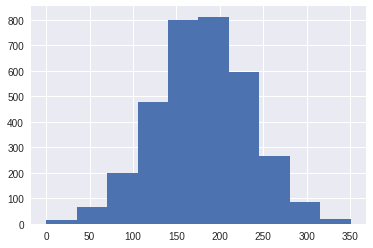

In [9]:
df['Total day minutes'].hist()

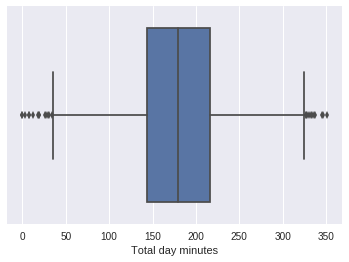

In [10]:
sns.boxplot(df['Total day minutes'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbad3bf3048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fbad362d160>]], dtype=object)

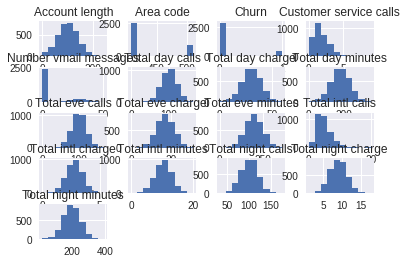

In [11]:
df.hist()

## 1.2. Категориальные + бинарные

In [12]:
df['State'].value_counts().head()

WV    106
MN     84
NY     83
AL     80
OR     78
Name: State, dtype: int64

In [13]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

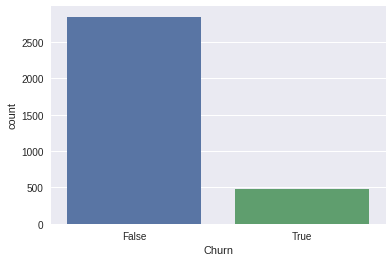

In [14]:
sns.countplot(df['Churn'])

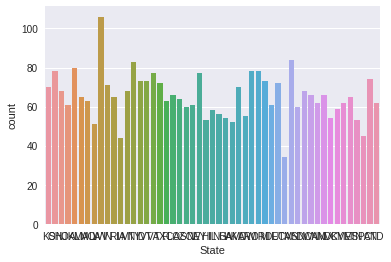

In [15]:
sns.countplot(df['State'])

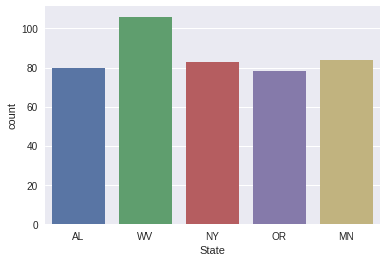

In [16]:
sns.countplot(df[df['State'].isin(df['State'].value_counts().head().index)]['State'])

In [17]:
df['State'].value_counts().head().index

Index(['WV', 'MN', 'NY', 'AL', 'OR'], dtype='object')

# 2. Взаимодействия
## 2.1. Колич-колич

In [18]:
feat = [f for f in df.columns if 'charge' in f]

In [19]:
feat

['Total day charge',
 'Total eve charge',
 'Total night charge',
 'Total intl charge']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbad320b7f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fbad2f4c390>]], dtype=object)

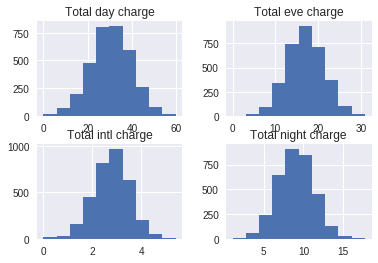

In [20]:
df.hist(feat)

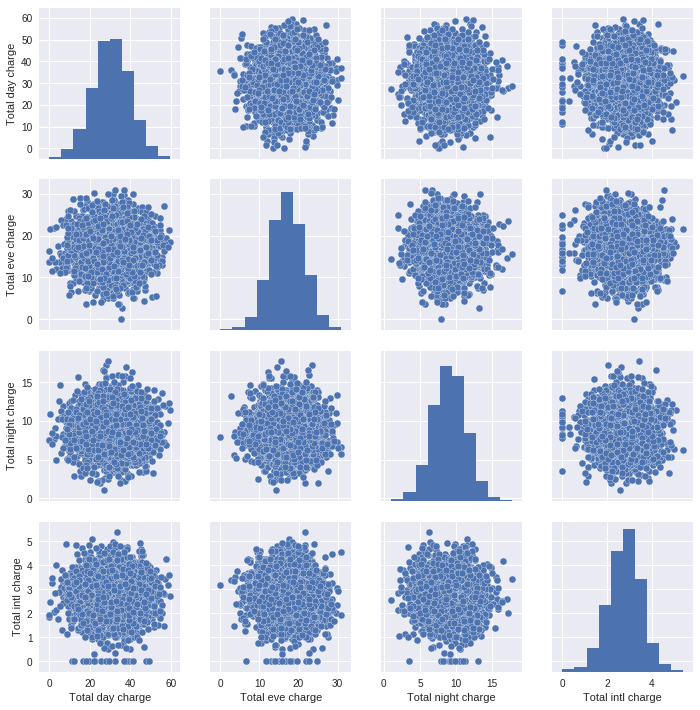

In [21]:
sns.pairplot(df[feat])

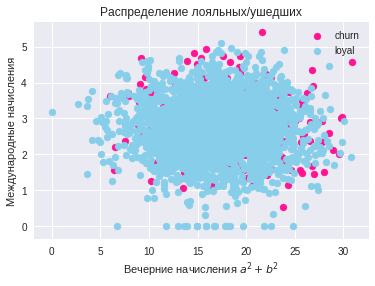

In [22]:
plt.scatter(df[df['Churn']]['Total eve charge'], df[df['Churn']]['Total intl charge'], color='deeppink', label='churn')
plt.scatter(df[~df['Churn']]['Total eve charge'], df[~df['Churn']]['Total intl charge'], color='skyblue', label='loyal')
plt.xlabel('Вечерние начисления $a^2 + b^2$')
plt.ylabel('Международные начисления')
plt.title('Распределение лояльных/ушедших')
plt.legend()

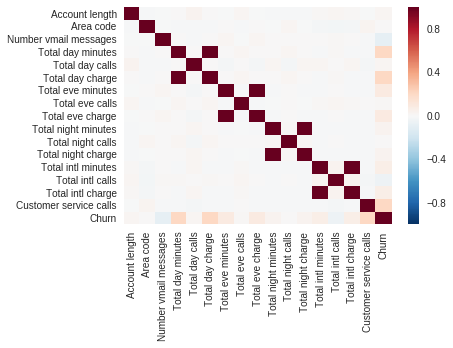

In [23]:
sns.heatmap(df.corr())

In [24]:
df.drop(feat, axis=1)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,OH,107,415,No,Yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,NJ,137,415,No,No,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,OH,84,408,Yes,No,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,OK,75,415,Yes,No,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False
5,AL,118,510,Yes,No,0,223.4,98,220.6,101,203.9,118,6.3,6,0,False
6,MA,121,510,No,Yes,24,218.2,88,348.5,108,212.6,118,7.5,7,3,False
7,MO,147,415,Yes,No,0,157.0,79,103.1,94,211.8,96,7.1,6,0,False
8,LA,117,408,No,No,0,184.5,97,351.6,80,215.8,90,8.7,4,1,False
9,WV,141,415,Yes,Yes,37,258.6,84,222.0,111,326.4,97,11.2,5,0,False


## 2.2. Колич-катег + колич-бинар

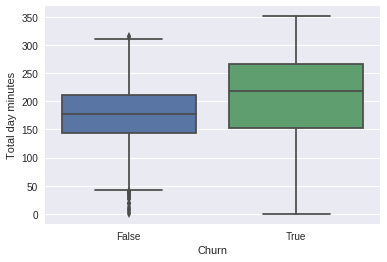

In [25]:
sns.boxplot(x='Churn', y='Total day minutes', data=df)

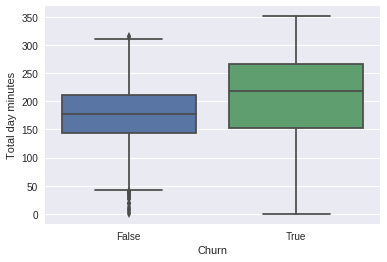

In [26]:
sns.boxplot(x=df['Churn'], y=df['Total day minutes'])

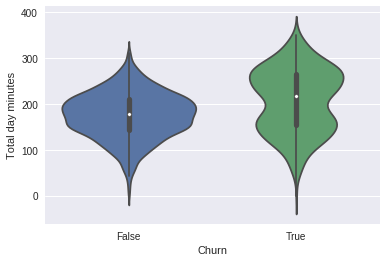

In [27]:
sns.violinplot(x=df['Churn'], y=df['Total day minutes'])

In [28]:
df.groupby('International plan')['Total day minutes'].mean()

International plan
No     178.893887
Yes    187.986997
Name: Total day minutes, dtype: float64

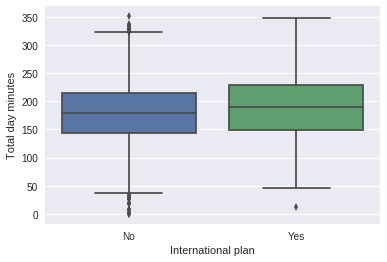

In [29]:
sns.boxplot(x=df['International plan'], y=df['Total day minutes'])

## 2.3. Катег-катег

In [30]:
pd.crosstab(df['Churn'], df['International plan'])

International plan,No,Yes
Churn,,
False,2664,186
True,346,137


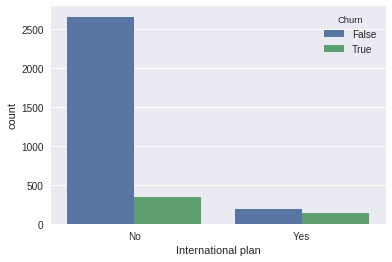

In [31]:
sns.countplot(x='International plan', hue='Churn', data=df)

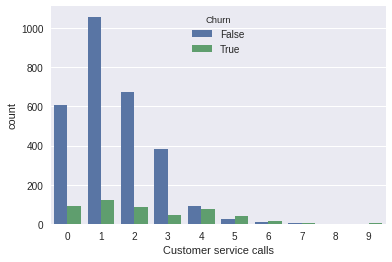

In [32]:
sns.countplot(x='Customer service calls', hue='Churn', data=df)

In [35]:
from sklearn.manifold import TSNE

In [36]:
TSNE?

In [37]:
tsne=TSNE(random_state=0)

In [38]:
df2=df.drop('State', axis=1)

In [43]:
df2['International plan']=df2['International plan'].map({'Yes': 1, 'No': 0})

In [45]:
df2['Voice mail plan']=df2['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [46]:
df2.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [47]:
tsne.fit(df2)

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300,
   perplexity=30.0, random_state=0, verbose=0)

In [49]:
tsne.embedding_

array([[-55.6721611 ,   1.65040481],
       [-13.47829056, -14.65928364],
       [-53.53569412, -16.56546021],
       ..., 
       [ 63.25523376,   0.56664979],
       [ 75.70656586,  -9.55361176],
       [-63.25998688,  11.53648376]], dtype=float32)

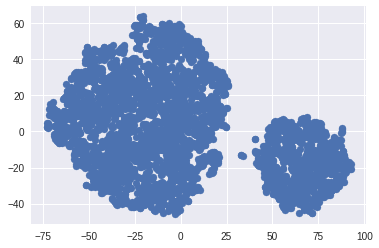

In [50]:
plt.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1])

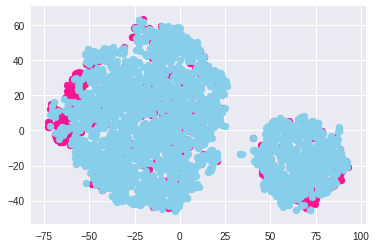

In [56]:
plt.scatter(tsne.embedding_[df2['Churn'].values, 0], tsne.embedding_[df2['Churn'].values, 1], color='deeppink')
plt.scatter(tsne.embedding_[~df2['Churn'].values, 0], tsne.embedding_[~df2['Churn'].values, 1], color='skyblue')